In [ ]:

# Progress report
# 1. Raw data obtained on: Ocotober 25th from the world bank data library. Got Population, military spending, and GDP
# 2. Code writing started on: October 29th
# 3. Code writing completed on: November 4th
# 4. # of code reviews and modifications: 15
# 5. # of presentation reviews and redos before submission: 3


In [43]:
# Import libraries for data processing and visualization
# INstall xlrd in order to read excel files that arent .csv

import pandas as pd
!pip install pandas openpyxl xlrd 
import matplotlib.pyplot as plt


In [44]:
# Set pandas display options for readability and preference

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 50)
pd.set_option('display.float_format', '{:.2f}'.format)


In [45]:
# Load datasets and skip irrelevant rows (first three rows are obsolete)

military_frame = pd.read_excel('/Users/rawfl/Python/Military.xls', skiprows=3)
gdp_frame = pd.read_excel('/Users/rawfl/Python/gdp.xls', skiprows=3)
population_frame = pd.read_excel('/Users/rawfl/Python/Population.xls', skiprows=3)


In [46]:
# List of regions or groupings to exclude
# Found on World Bank aggregate categories filter - took out the step of manually having to search for them

excluded_regions = ["Early-demographic dividend", "Late-demographic dividend","Arab World", "Africa Eastern and Southern", "Africa Western and Central", "World",
                      "Caribbean small states", "Central Europe and the Baltics", "East Asia & Pacific",
                      "Europe & Central Asia", "Euro area", "European Union", "Fragile and conflict affected situations",
                      "High income", "Heavily indebted poor countries (HIPC)", "IBRD only", "IDA & IBRD total",
                      "IDA total", "IDA blend", "IDA only", "Latin America & Caribbean",
                      "Least developed countries: UN classification", "Low & middle income", "Low income",
                      "Lower middle income", "Middle East & North Africa", "Middle income", "North America",
                      "OECD members", "Other small states", "Pacific island small states", "Post-demographic dividend",
                      "Pre-demographic dividend", "Small states", "South Asia", "Sub-Saharan Africa",
                      "Upper middle income", "East Asia & Pacific (excluding high income)", 
                      "Europe & Central Asia (excluding high income)", "Latin America & Caribbean (excluding high income)",
                      "Middle East & North Africa (excluding high income)", "Sub-Saharan Africa (excluding high income)",
                      "East Asia & Pacific (IDA & IBRD countries)", "Europe & Central Asia (IDA & IBRD countries)",
                      "Latin America & the Caribbean (IDA & IBRD countries)", "Middle East & North Africa (IDA & IBRD countries)",
                      "South Asia (IDA & IBRD)", "Sub-Saharan Africa (IDA & IBRD countries)", "OECD members"]

In [47]:
# Filter out non-country entries from each dataset
# Dropping any name in country name for all frames
# that is included in the excluded_regions list

for df in [military_frame, gdp_frame, population_frame]:
    df.drop(df[df['Country Name'].isin(excluded_regions)].index, inplace=True)



In [48]:
# display rows and columns to confirm data has loaded in correctly

print(military_frame.head())
print(military_frame.columns)


  Country Name Country Code                   Indicator Name  \
0        Aruba          ABW  Military expenditure (% of GDP)   
2  Afghanistan          AFG  Military expenditure (% of GDP)   
4       Angola          AGO  Military expenditure (% of GDP)   
5      Albania          ALB  Military expenditure (% of GDP)   
6      Andorra          AND  Military expenditure (% of GDP)   

      Indicator Code  1960  1961  1962  1963  1964  1965  1966  1967  1968  \
0  MS.MIL.XPND.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2  MS.MIL.XPND.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  MS.MIL.XPND.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5  MS.MIL.XPND.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
6  MS.MIL.XPND.GD.ZS   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

In [55]:
# Define the years of interest and select relevant columns only

years = ['2018', '2019', '2020', '2021', '2022']
military_frame = military_frame[['Country Name'] + years]
gdp_frame = gdp_frame[['Country Name'] + years]
population_frame = population_frame[['Country Name'] + years]

# Transforming datasets from wide to long format
# Makes the layout of the data more suitible, categorizes the years in row 
# Years instead of column. Keep it neat

military_frame = military_frame.melt(id_vars='Country Name', var_name='Year', value_name='Military Spending')
gdp_frame = gdp_frame.melt(id_vars='Country Name', var_name='Year', value_name='GDP')
population_frame = population_frame.melt(id_vars='Country Name', var_name='Year', value_name='Population')


In [59]:
# Merge datasets into a single DataFrame for analysis (very similar to sql) Easier to manipulate

merged_data = military_frame.merge(gdp_frame, on=['Country Name', 'Year']).merge(population_frame, on=['Country Name', 'Year'])

# Filter to the top 10 countries by total military spending over selected years 2018-2022

top_countries = military_frame.groupby('Country Name')['Military Spending'].sum().nlargest(10).index
merged_data = merged_data[merged_data['Country Name'].isin(top_countries)]


In [135]:
# Add calculated fields for data groups and in order to visualize
# Using the merged data

merged_data['Military % of GDP'] = (merged_data['Military Spending'] / merged_data['GDP']) * 100
merged_data['Military Spending per Capita'] = merged_data['Military Spending'] / merged_data['Population']
merged_data['GDP per Capita'] = merged_data['GDP'] / merged_data['Population']
merged_data['Military Spending Growth %'] = merged_data.groupby('Country Name')['Military Spending'].pct_change() * 100
merged_data['Military Spending Growth Absolute Value'] = merged_data.groupby('Country Name')['Military Spending'].diff()

In [133]:
# output the merged data to view
# some of the ouputs may be 0 becuase their values may be smaller or not available 
print(merged_data.head())

   Country Name  Year  Military Spending             GDP  Population  \
7       Armenia  2018               4.12  12457940694.74  2836557.00   
12   Azerbaijan  2018               3.56  47112470051.77  9939771.00   
55      Algeria  2018               5.48 194554483655.53 41927007.00   
95       Israel  2018               5.28 376691526553.28  8882800.00   
98       Jordan  2018               4.56  43370860704.23 10459865.00   

    Military % of GDP  Military Spending per Capita  GDP per Capita  \
7                0.00                          0.00         4391.92   
12               0.00                          0.00         4739.79   
55               0.00                          0.00         4640.31   
95               0.00                          0.00        42406.85   
98               0.00                          0.00         4146.41   

    Military Spending Growth %  Military Spending Growth Absolute  \
7                          NaN                                NaN   
12

In [81]:
merged_data

,Country Name,Year,Military Spending,GDP,Population,Military % of GDP,Military Spending per Capita,GDP per Capita,Military Spending Growth %,Military Spending Growth Absolute,Military Spending Growth Absolute Value
7,Armenia,2018,4.12,12457940694.74,2836557.00,0.00,0.00,4391.92,NaN,NaN,NaN
12,Azerbaijan,2018,3.56,47112470051.77,9939771.00,0.00,0.00,4739.79,NaN,NaN,NaN
55,Algeria,2018,5.48,194554483655.53,41927007.00,0.00,0.00,4640.31,NaN,NaN,NaN
95,Israel,2018,5.28,376691526553.28,8882800.00,0.00,0.00,42406.85,NaN,NaN,NaN
98,Jordan,2018,4.56,43370860704.23,10459865.00,0.00,0.00,4146.41,NaN,NaN,NaN
107,Kuwait,2018,5.19,138202535962.40,4317185.00,0.00,0.00,32012.19,NaN,NaN,NaN
150,Oman,2018,8.27,91505851755.53,4601157.00,0.00,0.00,19887.57,NaN,NaN,NaN
166,Russian Federation,2018,3.72,1657328773461.31,145398106.00,0.00,0.00,11398.56,NaN,NaN,NaN
168,Saudi Arabia,2018,9.14,846583733333.33,35018133.00,0.00,0.00,24175.58,NaN,NaN,NaN
202,Ukraine,2018,3.19,130891088293.55,44690584.00,0.00,0.00,2928.83,NaN,NaN,NaN


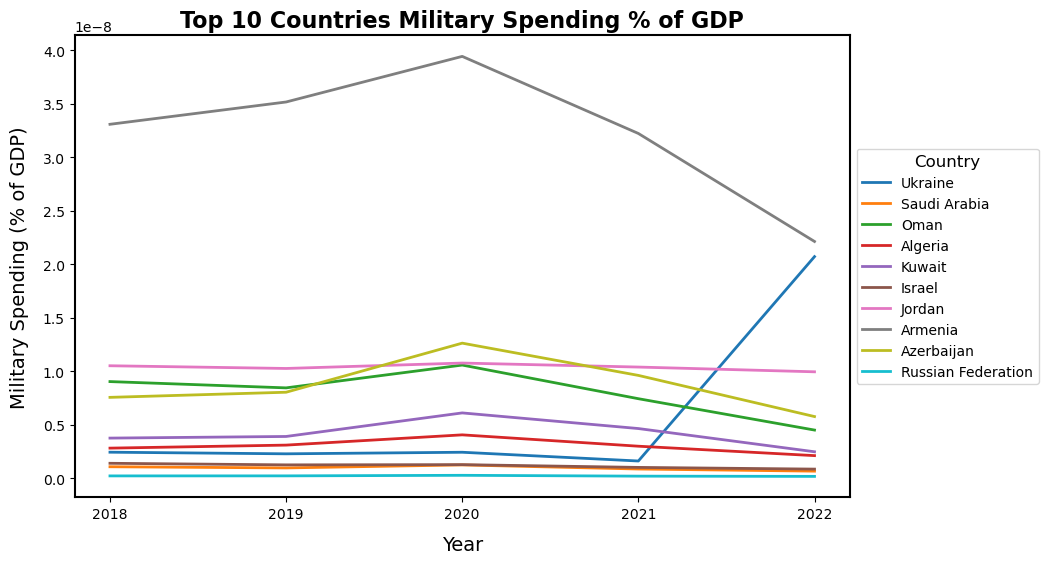

In [87]:
# Plot: Military Spending as a Percentage of GDP for top 10 countries
# tried to have fun using different style of chart but will have to stick with default
plt.figure(figsize=(10, 6))
plt.style.use('default')

#plotting the chart with thick lines
for country in top_countries:
    country_data = merged_data[merged_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Military % of GDP'], label=country, linewidth=2)

#Adding the title and labels with thicker bolder font
plt.title('Top 10 Countries Military Spending % of GDP', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14, labelpad=10)
plt.ylabel('Military Spending (% of GDP)', fontsize=14, labelpad=10)

#Cleaning up the legend for visibility
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, title_fontsize=12)

#Creating thicker borders for the axes
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

plt.savefig('m.percent_gdp.png', dpi=200, bbox_inches='tight')
plt.show()

In [137]:
# Calculate and plot Average Military Spending per Capita vs. Average GDP per Capita
average_spend = merged_data.groupby('Country Name').agg({ 'Military Spending per Capita': 'mean', 'GDP per Capita': 'mean'
}).reset_index()


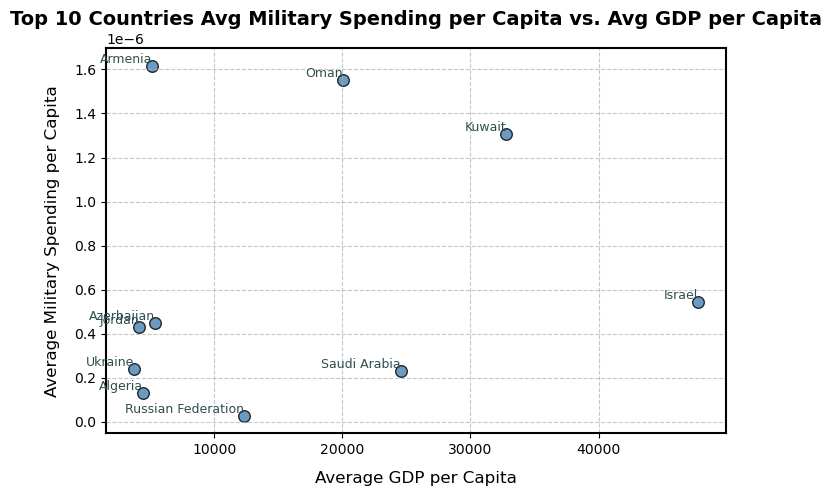

In [139]:
# Defining plot styling

plt.figure(figsize=(8, 5))
plt.style.use('default')

# Plotting the scatter data with a cleaner appearence
# Increasing size and adding border to points for better visibility 
plt.scatter(average_spend['GDP per Capita'], average_spend['Military Spending per Capita'], s=70, alpha=0.8, color='steelblue', edgecolor='black')


for i, row in average_spend.iterrows():
    plt.text(row['GDP per Capita'], row['Military Spending per Capita'], row['Country Name'], fontsize=9, ha='right', va='bottom', 
             color='darkslategray')

#formatting and styling title and labels 
plt.title('Top 10 Countries Avg Military Spending per Capita vs. Avg GDP per Capita', fontsize=14, weight='bold')
plt.xlabel('Average GDP per Capita', fontsize=12, labelpad =10)
plt.ylabel('Average Military Spending per Capita', fontsize=12, labelpad=10)


# Thicker borders for the plot
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# styling the grid for dashed lines and subtle visibility for clean aesthetic
plt.grid(True, linestyle='--', alpha=0.7)

plt.savefig('military_vs_gdp.png', dpi=200, bbox_inches='tight')
plt.show()


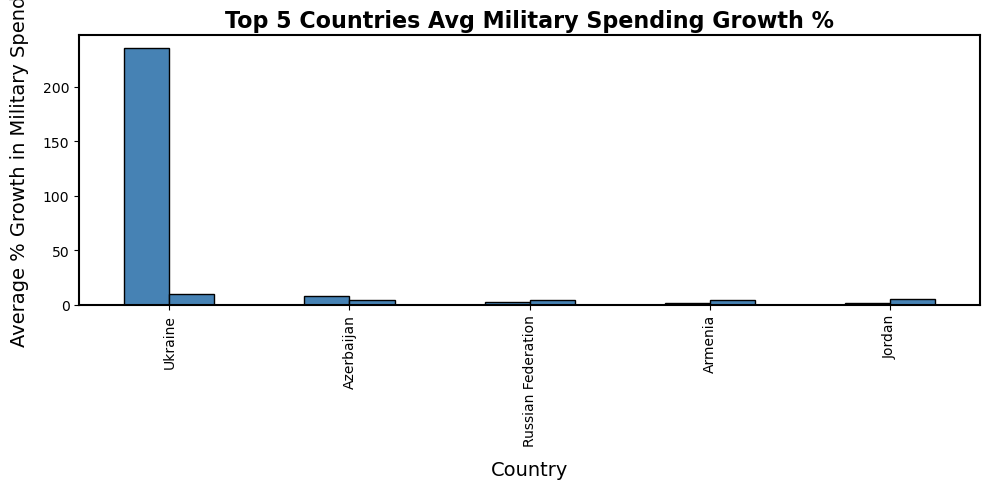

In [141]:
# Create bar plot with improved styling
plt.figure(figsize=(10, 5))
plt.style.use('default')  # Clean background style

# Plotting the data with additional customization
# Adding edge color to the bars
# Border width of the bars
# Use the current axis for better control
growth_data.plot(
    kind='bar', color='steelblue', edgecolor='black', linewidth=1, legend=False, ax=plt.gca())

# Enhancing title and labels with larger fonts and bold style
plt.title('Top 5 Countries Avg Military Spending Growth %', fontsize=16, weight='bold')
plt.xlabel('Country', fontsize=14, labelpad=10)
plt.ylabel('Average % Growth in Military Spend', fontsize=14, labelpad=10)

# Thicker borders for the plot's axes
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)

# Adjust layout and save
plt.tight_layout()
plt.savefig('top5_count_mil.png', dpi=200)
plt.show()
